<a href="https://colab.research.google.com/github/guiferso/terras-indigenas/blob/main/terras_indigenas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Identificando Terras Indígenas no Brasil e na Amazônia Legal com Python**

O Brasil, no seu contexto histórico e em toda sua extensão territorial, possui grandes desafios em relação aos povos indígenas. Durante o período inicial da colonização brasileira entre 1540 à 1580, a população indígena amargou o auge da escravização imposta pelo eurocentrismo e que, no decorrer dos anos subsequentes, sofreriam com as sequelas que podem ser observadas até nos dias atuais. O maior desafio da atualidade é evitar que as tradições, que os modos de vida e que comunidades tradicionais sejam apagadas e/ou desvalorizadas.

Em contrapartida, a riqueza natural do Brasil também tem sido debatida nas principais conferências sobre meio ambiente, como na COP 27 no Egito em 2022. Nesse contexto, a Amazônia se encontra em posição de destaque e discutir sobre como frear o aumento do desmatamento e como evitar o desmantelamento dos povos tradicionais é um debate mais que urgente para contornar os cenários atuais.

Neste estudo, a proposta é localizar as Terras Indígenas do Brasil e da Amazônia Legal através da linguagem de programação Python. Para isso, alguns pacotes precisam ser instalados para possibilitar a análise no ambiente virtual proporcionado pelo Google Colab.

Na primeira linha do código, escrevemos o comando !pip install e depois colocamos os nomes dos seguintes pacotes:

**geobr** : O pacote geobr fornece acesso rápido e fácil aos conjuntos de dados espaciais oficiais do Brasil. A sintaxe de todas as funções geobr opera em uma lógica simples que permite aos usuários baixar facilmente uma ampla variedade de conjuntos de dados com geometrias atualizadas e atributos harmonizados e projeções geográficas em várias regiões e anos. Esta vinheta apresenta uma introdução rápida ao geobr.

**geopandas** : é um projeto de código aberto para facilitar o trabalho com dados geoespaciais em python. O GeoPandas estende os tipos de dados usados pelos pandas para permitir operações espaciais em tipos geométricos. As operações geométricas são executadas por bem torneadas. Geopandas depende ainda mais de fiona para acesso a arquivos e matplotlib para pilotagem.

**contextily** : é um pequeno pacote Python 3 (3.7 e superior) para recuperar mapas de blocos da Internet. Ele pode adicionar esses blocos como mapa base para figuras matplotlib ou gravar mapas de blocos no disco em arquivos raster geoespaciais.

**rtree** : é uma biblioteca Python que usa ctypes para agrupar libspatialindex . O Rtree passou por várias iterações e, na versão 0.5.0, foi completamente refatorado para usar uma nova arquitetura interna (ctypes + uma API C sobre libspatialindex ). Essa refatoração resultou em vários novos recursos e muito mais flexibilidade.

**shapely** : é um pacote Python licenciado pela BSD para manipulação e análise de objetos geométricos planares. Ele está usando a biblioteca de geometria de código aberto amplamente implantada GEOS (o mecanismo do PostGIS e uma porta do JTS). Shapely envolve geometrias e operações GEOS para fornecer uma interface Geometry rica em recursos para geometrias singulares (escalares) e funções NumPy de alto desempenho para operações usando matrizes de geometrias. Shapely não é focado principalmente em formatos de serialização de dados ou sistemas de coordenadas, mas pode ser facilmente integrado com pacotes que são. Quando instalamos a geopandas já instalamos o pacote shapely, mas para evitar erros iremos instalar na versão 1.7.0.

In [ ]:
#Instalar os pacotes Geobr, Geopandas, Contextily, Shapely e Rtree
!pip install geobr geopandas contextily shapely==1.7.0 rtree -q

O próximo passo é importar todas as bibliotecas instaladas e também as que darão estrutura para o código, como a **Matplotlib** que é abrangemente utilizada para criar visualizações estáticas, animadas e interativas em Python.

Também importaremos o pacote **rtree** para evitar erros no código. 

In [2]:
#Importar os Pacotes instalados
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
import geobr
import rtree

Com as importações realizadas, daremos sequência na análise realizando a verificação dos dados contidos no **geobr** para ter uma noção das possibilidades de uso que o pacote permite. Para isso, escrevemos o nome do pacote seguido de **list_geobr()** para conhecermos todas as suas funções.

In [3]:
#Verificar a lista dos dados do pacote geobr
geobr.list_geobr()

Function: read_country
Geographies available: Country
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_region
Geographies available: Region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_state
Geographies available: States
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_meso_region
Geographies available: Meso region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_micro_region
Geographies available: Micro region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020

O objetivo é identificar as terras indígenas do Brasil e depois da Amazônia Legal. Iremos começar pelo limite do Brasil. Então, criamos a variável **brasil** que vai armazenar o comando **geobr.read_country(year=2020)** definindo o último ano de atualização da função. Podemos ler as primeiras cinco linhas do GeoDataFrame utilizando **.head()** na frente da variável criada.

In [4]:
#Analisar a base do Brasil
brasil = geobr.read_country(year=2020)
brasil.head()

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-65.38150 -10.42907, -65.37916..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.08554 ..."
2,13.0,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.71230 ..."
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2..."
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42843 ..."


Trabalhar com dados geográficos sempre requer muita atenção no sistema de projeção a ser usado, tendo em mente que todos os dados geográficos precisam estar com o mesmo sistema para evitar erros. Para a variável **brasil** criada, vamos utilizar o sistema de projeção SIRGAS 2000. Ao escrever a variável **brasil** seguida de **.crs** e igualando ao **= EPSG:4674**, estamos definindo o sistema de projeção.

In [5]:
#Definir o sistema de projeção do limite do Brasil
brasil.crs = "EPSG:4674"
brasil.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Agora já podemos fazer a primeira plotagem de um mapa no código. Iremos utilizar o comando **.plot()** para plotar a variável **brasil**. Dentro do parênteses podemos colocar parâmetros como tamanho da figura (figsize), a transparência da superfície (alpha, sempre variando entre 0 e 1, onde 0 é transparente e 1 não) e a cor dos limites (edgecolor, podendo escolher as cores no padrão hexadecimal, onde aqui escolhemos a cor preta), igualando tudo isso a uma variável nova chamada **ax**, que será o eixo onde armazenamos o limite do Brasil. Abaixo, chamamos o pacote **cx** seguido de **.add_basemap(ax, crs= brasil.crs)** para adicionar um mapa base a plotagem e definindo o crs (sistema de projeção) equivalente à variável **brasil** seguido de **.crs**. 

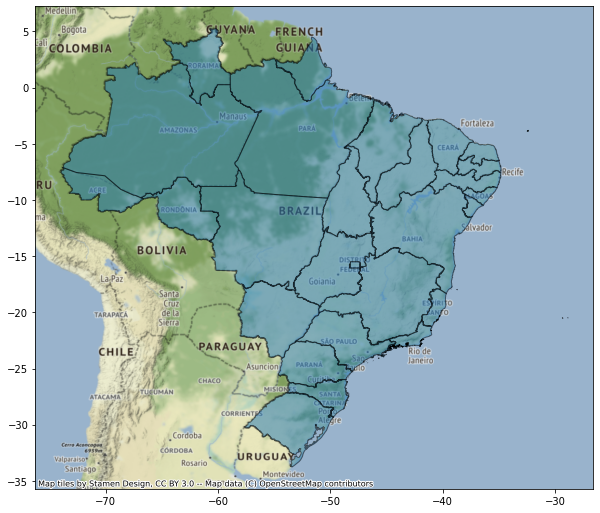

In [6]:
#Plotar a variável Brasil
ax = brasil.plot(figsize=(10, 10), alpha=0.5, edgecolor="#000000")
cx.add_basemap(ax, crs= brasil.crs)

O próximo passo é identificar as terras indígenas dentro do pacote **geobr**. Então, criamos a variável **indigenas** que vai armazenar o comando **geobr.read_indigenous_land(year=201907)**. A data de atualização escolhida foi **201907** por não apresentar caracteres especiais em seus dados e facilitar na hora de plotar a legenda do mapa final. Podemos ler as primeiras cinco linhas do GeoDataFrame utilizando **.head()** na frente da variável criada. 

In [8]:
#Terras indígenas
indigenas = geobr.read_indigenous_land(date=201907)
indigenas.head()

,gid,code_terrai,terrai_nom,etnia_nome,name_muni,abbrev_state,superficie,fase_ti,modalidade,reestudo_t,cr,faixa_fron,undadm_cod,undadm_nom,undadm_sig,date,code_state,geometry
0,1,101,Acapuri de Cima,Kokama,Fonte Boa,AM,18393.9411,Declarada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL DO ALTO SOLIMOES,Não,3.020200e+10,COORDENACAO REGIONAL DO ALTO SOLIMOES,CR-AS,201907.0,13.0,"POLYGON ((-66.88359 -2.53752, -66.76187 -2.538..."
1,2,201,Acimã,Apurinã,Lábrea,AM,40686.0340,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL MÉDIO PURUS,Não,3.020200e+10,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPUR,201907.0,13.0,"POLYGON ((-66.30929 -7.79995, -66.30751 -7.798..."
2,57,601,Aconã,Tingui-Botó,Traipu,AL,267.7862,Regularizada,Reserva Indígena,None,COORDENACAO REGIONAL NORDESTE I,Não,3.020200e+10,COORDENACAO REGIONAL NORDESTE I,CR-NE-I,201907.0,27.0,"POLYGON ((-36.94514 -10.07113, -36.93793 -10.0..."
3,62,401,Água Preta/Inari,Apurinã,Pauini,AM,139763.6705,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL MÉDIO PURUS,Não,3.020200e+10,COORDENACAO REGIONAL MÉDIO PURUS,CR-MPUR,201907.0,13.0,"POLYGON ((-67.29764 -7.33958, -67.29504 -7.336..."
4,1510,35502,Toldo Pinhal,Kaingang,"Seara,Paial",SC,4846.0000,Declarada,Tradicionalmente ocupada,Reestudo,COORDENACAO REGIONAL INTERIOR SUL,Sim,3.020200e+10,COORDENACAO REGIONAL INTERIOR SUL,CR-INTS,201907.0,42.0,"POLYGON ((-52.41814 -27.10904, -52.41717 -27.1..."


Para a variável **indigenas** criada, vamos utilizar o sistema de projeção SIRGAS 2000. Ao escrever a váriavel **indigenas** seguida de **.crs** e igualando ao **= EPSG:4674**, estamos definindo o sistema de projeção.

In [9]:
#Definir o sistema de de projeção das Terras Indígenas
indigenas.crs = "EPSG:4674"
indigenas.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Neste ponto, como temos duas variáveis criadas e já definimos o sistema de projeção delas, iremos comparar se o sistema é o mesmo. Se for o mesmo sistema, o código retornará **True** e se não for o mesmo, o código retornará **False**. Para comparar, é só escrever a primeira variável seguida de **.crs** e utilizar o operador de igualdade **==** seguido da segunda variável também com **.crs** depois. 

In [10]:
#Conferir os sistemas de projeção
brasil.crs == indigenas.crs

True

Iremos fazer a segunda plotagem de um mapa no código. Utilizamos o comando **.plot()** para plotar a variável **indigenas**. Podemos copiar os parâmetros usados na variável **brasil** como base. Abaixo, chamamos o pacote **cx** seguido de **.add_basemap(ax, crs= brasil.crs)** para adicionar um mapa base a plotagem e definindo o crs (sistema de projeção) equivalente à variável **brasil** seguido de **.crs**.

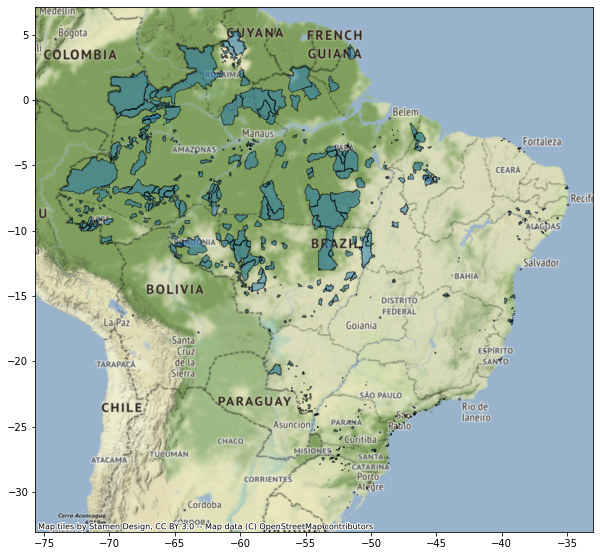

In [11]:
#Plotagens dos dados
ax = indigenas.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, crs= brasil.crs)

O primeiro mapa final é o de Terras Indígenas do Brasil classificadas de acordo com sua modalidade. 

Escolhemos o tamanho do mapa com o comando **fig, ax = plt.subplots(figsize=(15,15))**.

Criamos uma variável chamada **base** para conter o limite do **brasil** seguido de **.plot(ax=ax, color="gray", alpha= 0.5, edgecolor="black")**.

Depois plotamos as terras indígenas, escolhendo os argumentos como o eixo **ax** sendo igual a **base**, a columa de "modalidade", a legenda como **True** para aparecer no mapa e a cor do mapa **cmap** como "coolwarm". A linha de código ficará assim: **indigenas.plot(ax=base, column="modalidade", legend=True, cmap="coolwarm")**

Com **ax.set_title()** definimos o título do mapa e dentro do parênteses colocamos "Terras Indígenas do Brasil".

Adicionamos a linha **cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs= brasil.crs)** para adicionar o mapa base. 

E por fim, o comando **plt.show()** irá plotar todas as informações que vimos até aqui.

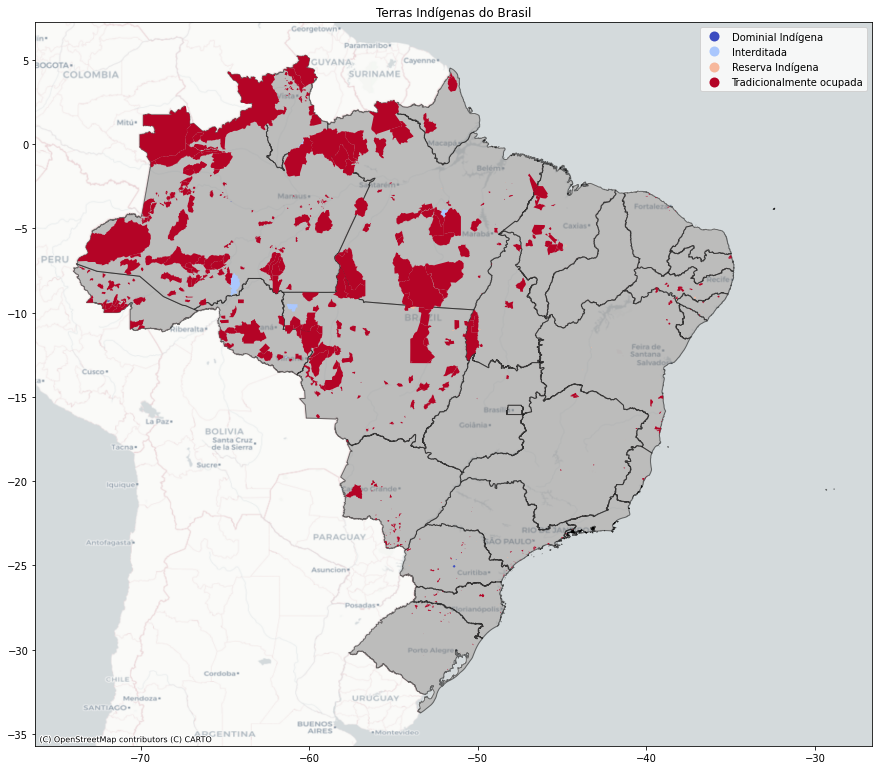

In [12]:
#Plotar o mapa de Terras Indígenas do Brasil
fig, ax = plt.subplots(figsize=(15,15))
base = brasil.plot(ax=ax, color="gray", alpha= 0.5, edgecolor="black")
indigenas.plot(ax=base, column="modalidade", legend=True, cmap="coolwarm")
ax.set_title("Terras Indígenas do Brasil")
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs= brasil.crs)
plt.show()

Dando sequência, precisamos identificar o limite da Amazônia Legal dentro do pacote geobr. Então, criamos a variável **amazonia** que vai armazenar o comando **geobr.read_amazon()**. 

In [13]:
#Amazônia Legal
amazonia = geobr.read_amazon()
amazonia

,geometry
0,"MULTIPOLYGON (((-73.19106 -9.36729, -73.18845 ..."


Para a variável **amazonia** criada, vamos utilizar o sistema de projeção SIRGAS 2000. Ao escrever a váriavel indigenas seguida de **.crs** e igualando ao **= EPSG:4674**, estamos definindo o sistema de projeção.

In [14]:
#Definir o sistema de projeção da Amazônia Legal
amazonia.crs = "EPSG:4674"
amazonia.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Aqui também, como temos variáveis criadas e já definimos o sistema de projeção delas, iremos comparar se o sistema é o mesmo. Se for o mesmo sistema, o código retornará **True** e se não for o mesmo, o código retornará **False**. Para comparar, é só escrever a primeira variável seguida de **.crs** e utilizar o operador de igualdade **==** seguido da segunda variável também com **.crs** depois.

In [15]:
#Conferir os sistemas de projeção
amazonia.crs == indigenas.crs

True

Para saber as terras indígenas que se encontram dentro dos limites da Amazônia Legal, iremos utilizar a função **.sjoin** do pacote **geopandas** (importando no início como **gpd**), onde será realizada a junção das terras indígenas (variável **indigenas**) com a Amazônia Legal (variável **amazonia**). Tudo isso será armazenado como **amazonia_indigenas**.

In [16]:
#Fazer a junção da Amazônia Legal e das Terras Indígenas
amazonia_indigenas = gpd.sjoin(indigenas, amazonia)

O segundo mapa final é o de Terras Indígenas da Amazônia Legal classificadas de acordo com sua modalidade.

Escolhemos o tamanho do mapa com o comando **fig, ax = plt.subplots(figsize=(15,15))**.

Criamos uma variável chamada **base** para conter o limite da **amazonia** seguido de **.plot(ax=ax, color="gray", alpha= 0.5, edgecolor="black")**.

Depois plotamos a junção das terras indígenas com a Amazônia Legal, escolhendo os argumentos como o eixo **ax** sendo igual a **base**, a columa de "modalidade", a legenda como **True** para aparecer no mapa e a cor do mapa **cmap** como "coolwarm". A linha de código ficará assim: **amazonia_indigenas.plot(ax=base, column="modalidade", legend=True, cmap="coolwarm")**

Com **ax.set_title()** definimos o título do mapa e dentro do parênteses colocamos "Terras Indígenas da Amazônia Legal".

Adicionamos a linha **cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs= brasil.crs)** para adicionar o mapa base.

E por fim, o comando **plt.show()** irá plotar todas as informações que vimos até aqui.

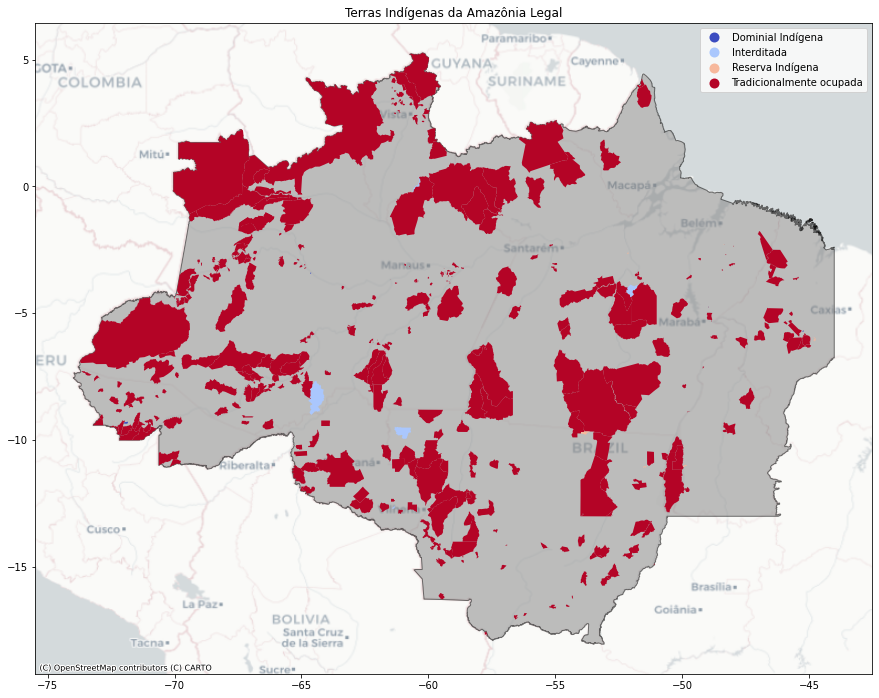

In [17]:
#Plotar o mapa de Terras Indígenas da Amazônia Legal
fig, ax = plt.subplots(figsize=(15,15))
base = amazonia.plot(ax=ax, color="gray", alpha= 0.5, edgecolor="black")
amazonia_indigenas.plot(ax=base, column="modalidade", legend=True, cmap="coolwarm")
ax.set_title("Terras Indígenas da Amazônia Legal")
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs= brasil.crs)
plt.show()

Referências: 

Dani Arribas-Bel. (2016) contextily: context geo tiles in Python. GitHub repository - https://github.com/darribas/contextily.

FUNAI, 2019 - https://www.gov.br/funai/pt-br/atuacao/terras-indigenas.

GEOS contributors (2021). GEOS computational geometry library. Open Source Geospatial Foundation. URL https://libgeos.org/.

IBGE, 2020.

Kelsey Jordahl, Joris Van den Bossche, Martin Fleischmann, Jacob Wasserman, James McBride, Jeffrey Gerard, … François Leblanc. (2020, July 15). geopandas/geopandas: v0.8.1 (Version v0.8.1). Zenodo. http://doi.org/10.5281/zenodo.3946761

Pereira, R.H.M.; Gonçalves, C.N.; et. all (2019) geobr: Loads Shapefiles of Official Spatial Data Sets of Brazil. GitHub repository - https://github.com/ipeaGIT/geobr.

Rtree GitHub repository - https://github.com/Toblerity/rtree.